# Structure Factor

## NB! This code is old and broken

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import colors as col
from numpy import pi as π

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('notebook')
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Understanding Results from: Ferré and Boronat
https://link.aps.org/doi/10.1103/PhysRevB.93.104510

### Paper Parameters

In [3]:
T = 1.2 #K
ρ =  0.021858 # 1/Å^3
N = 64
τ = 0.0104 # (1/K)
L = (N/ρ)**(1/3)
q = [1.91,1.24,0.43]
M = int(1.0/(T*τ))

In [4]:
print("L = ", L)
print("M = ", M)


L =  14.306163499576725
M =  80


### What wave-vectors does this correspond to?

In [5]:
def qvec(nx,ny,nz):
    return (2.0*π/L)*np.array([nx,ny,nz])

In [6]:
print('100, ',np.linalg.norm(qvec(1,0,0)))
print('111, ',np.linalg.norm(qvec(1,1,1)))
print('220, ',np.linalg.norm(qvec(2,2,0)))
print('004, ',np.linalg.norm(qvec(0,0,4)))
print('223, ',np.linalg.norm(qvec(2,2,3)))
print('140, ',np.linalg.norm(qvec(0,4,1)))
print('133, ',np.linalg.norm(qvec(1,3,3)))

100,  0.4391942890464999
111,  0.760706823022629
220,  1.2422290401727387
004,  1.7567771561859995
223,  1.8108444439067723
140,  1.8108444439067726
133,  1.9144035225338853


### Load their figure 1 data

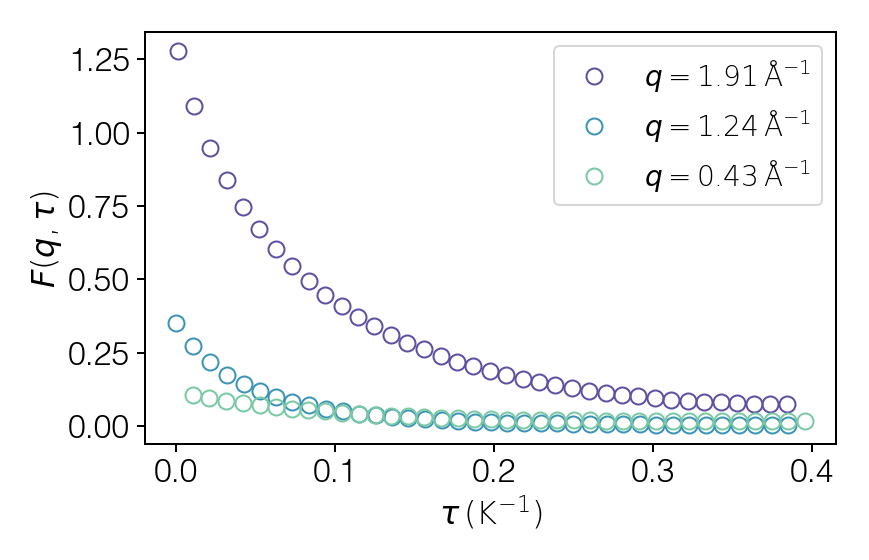

In [11]:
FB_isf = np.loadtxt('Input/boronat_data.dat')
for i in range(3):
    plt.plot(FB_isf[:,2*i],FB_isf[:,2*i+1],'o', mfc='None', label=r'$q ={:5.2f}\, {{\rm \AA}}^{{-1}}$'.format(q[i]))
plt.ylabel(r'$F(q,\tau)$')
plt.xlabel(r'$\tau\, (\rm K^{-1})$');
plt.legend()

## Comparing with our results

In [12]:
ssf = np.loadtxt('Input/ssf.dat')
pcf = np.loadtxt('Input/pcf.dat')
disf = np.loadtxt('Input/isf.dat')

# we need to unpack the flattened isf data
isf = {}
for i,cq in enumerate(q[::-1]):
    isf['{:4.2f}'.format(cq)] = disf[M*i:(i+1)*M,:]

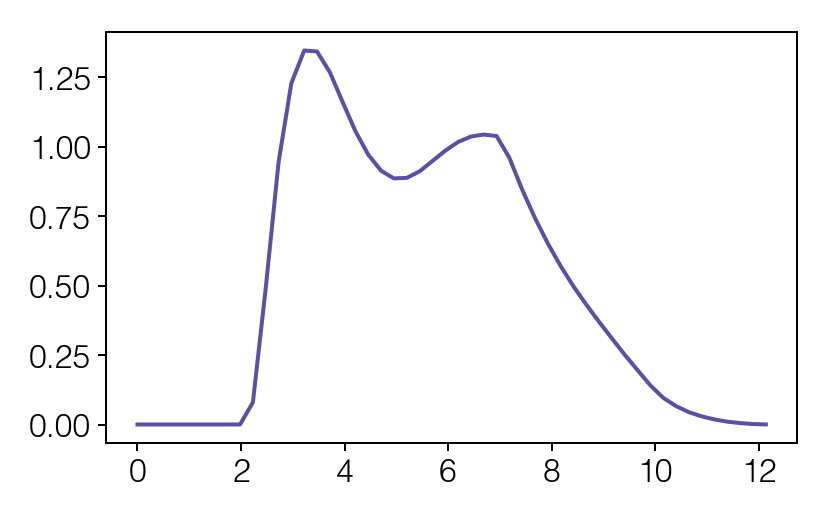

In [13]:
plt.plot(pcf[:,0],pcf[:,1])

In [14]:
from scipy.integrate import simps
def K(k,r,g):
    ρ = 0.02186
    return 4*π*ρ*(r*np.sin(k*r)/k)*(g)
    
r = pcf[:,0]
g = pcf[:,1]

S = np.zeros_like(ssf[:,0])
for i,cq in enumerate(ssf[:,0]):
    S[i] = 1+ simps(K(cq,r,g),r)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


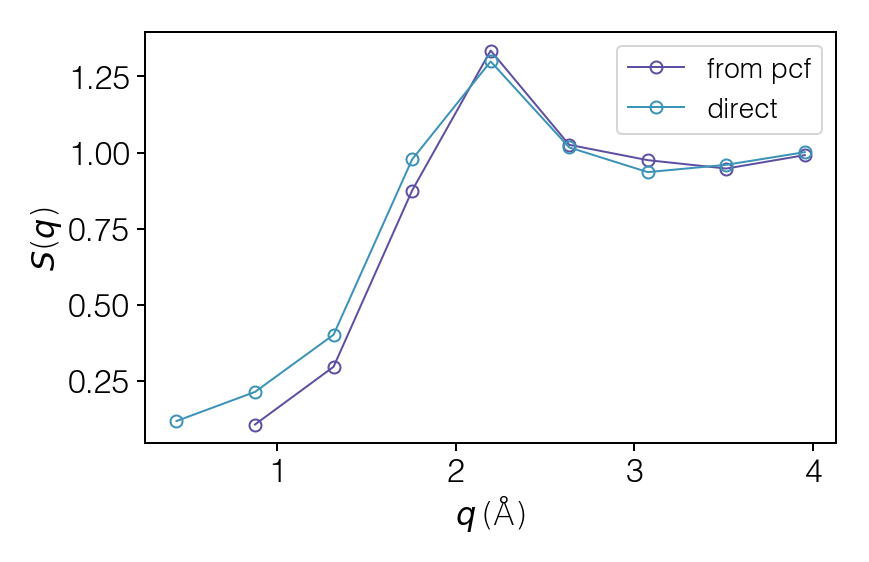

In [15]:
plt.plot(ssf[2:,0],S[2:],'-o', ms=6, lw=1, mfc='None', label='from pcf')
plt.plot(ssf[1:,0],ssf[1:,1],'-o', ms=6, lw=1, mfc='None', label='direct')

plt.legend()
plt.ylabel(r'$S(q)$')
plt.xlabel(r'$q\, (\rm \AA)$');

## Intermediate Scattering Function

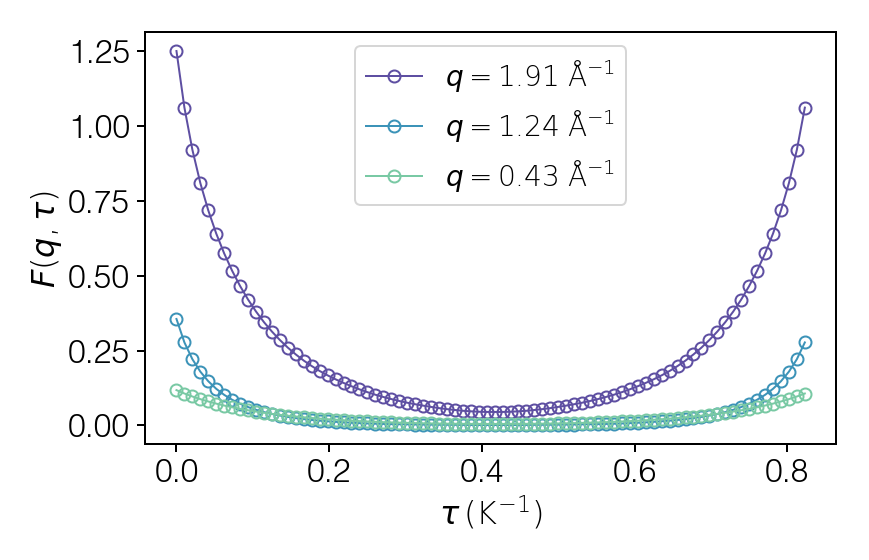

In [16]:
for cq in q:
    key = '{:4.2f}'.format(cq)
    plt.plot(isf[key][:,0],isf[key][:,1], '-o', ms=6, lw=1, mfc='None',label=r'$q=%4.2f\; {\rm\AA}^{-1}$' % cq)

    plt.legend()
plt.ylabel(r'$F(q,\tau)$')
plt.xlabel(r'$\tau\, (\rm K^{-1})$');

### Compare

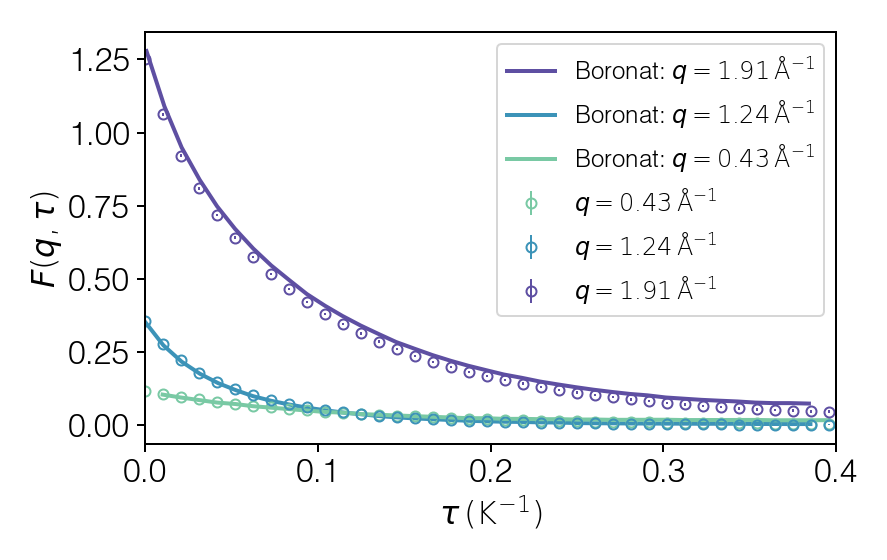

In [18]:
for i in range(3):
    plt.plot(FB_isf[:,2*i],FB_isf[:,2*i+1],'-', color=cols[i], 
            label=r'Boronat: $q ={:5.2f}\, {{\rm \AA}}^{{-1}}$'.format(q[i]))

for i,cq in enumerate(q[::-1]):
    key = '{:4.2f}'.format(cq)
    j=len(q)-1-i
    plt.errorbar(isf[key][:,0],isf[key][:,1],yerr=isf[key][:,2], mec=cols[j], marker='o',ms=5, ls='None', 
                 elinewidth=1,mfc='None',ecolor=cols[j],label=r'$q ={:5.2f}\, {{\rm \AA}}^{{-1}}$'.format(cq))
plt.legend(fontsize=12)
plt.ylabel(r'$F(q,\tau)$')
plt.xlabel(r'$\tau\, (\rm K^{-1})$');
plt.xlim(0,0.4)
plt.savefig('Output/Fqtau_compare.png')

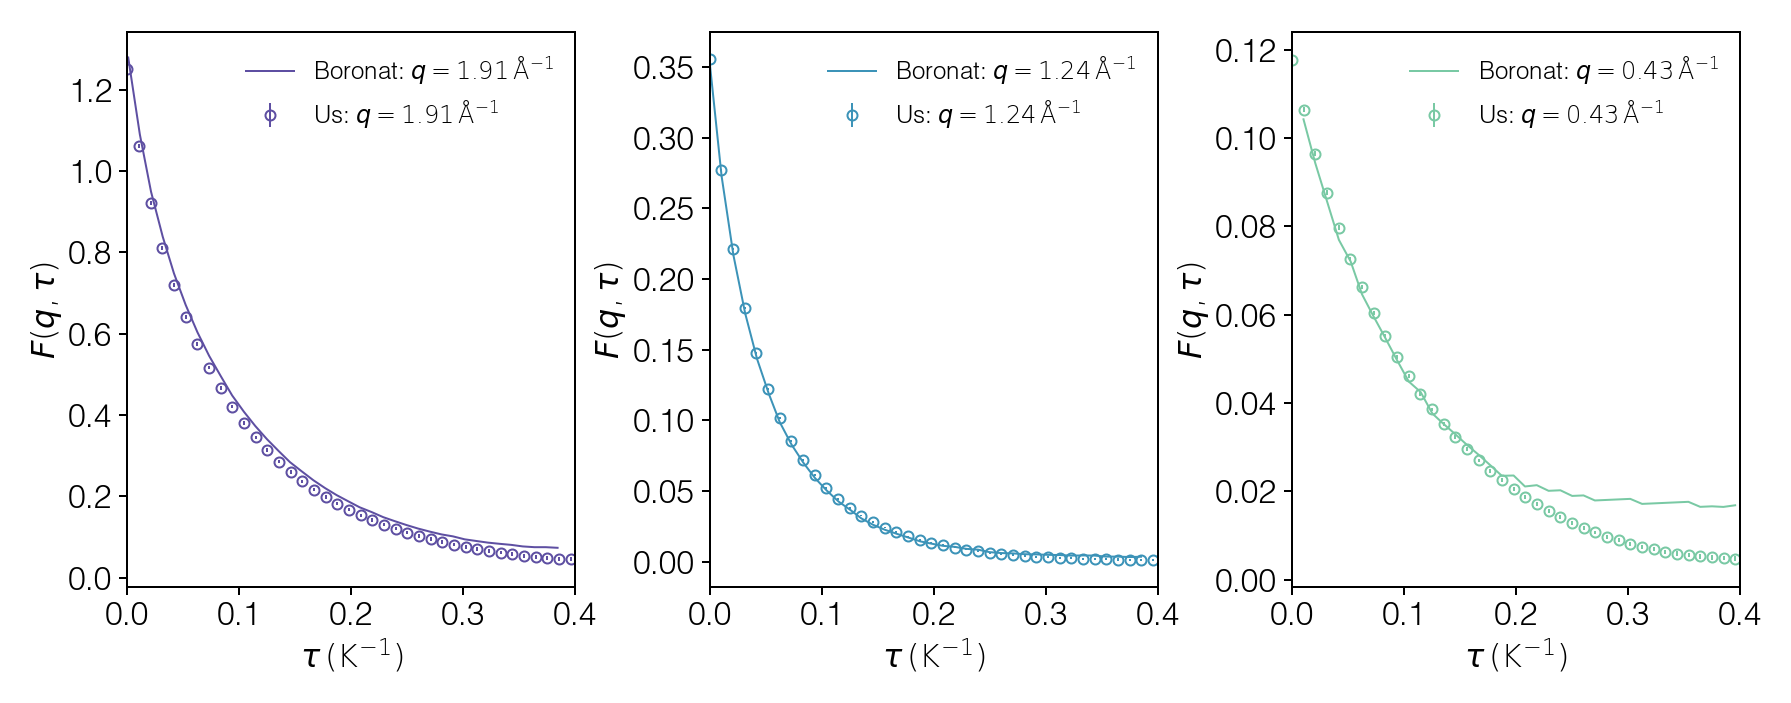

In [33]:
fig, ax = plt.subplots(1,3, sharex=True, figsize=(14,5), squeeze=True)
fig.subplots_adjust(wspace=0.3)

for i,cq in enumerate(q):
    ax[i].plot(FB_isf[:,2*i],FB_isf[:,2*i+1],'-', color=cols[i], lw=1,
             label=r'Boronat: $q ={:5.2f}\, {{\rm \AA}}^{{-1}}$'.format(cq))
    
    j=len(q)-1-i
    key = '{:4.2f}'.format(cq)
    ax[i].errorbar(isf[key][:,0],isf[key][:,1],yerr=isf[key][:,2], mec=cols[i], marker='o',ms=5, ls='None', 
                  elinewidth=1,mfc='None',ecolor=cols[i],label=r'Us: $q ={:5.2f}\, {{\rm \AA}}^{{-1}}$'.format(cq))

    
    
    ax[i].set_xlim(0,0.4)
    ax[i].set_ylabel(r'$F(q,\tau)$')
    ax[i].legend(fontsize=12, frameon=False)

    ax[i].set_xlabel(r'$\tau\, (\rm K^{-1})$');
plt.savefig('Output/F_q_tau_boronat_compare.png', dpi=300, transparent=False)

In [278]:
key = '{:4.2f}'.format(1.91)
np.savetxt('Output/Gtau.dat',isf[key][:,:3],delimiter='\t')

In [313]:
np.exp(-116000)

0.0

In [ ]:
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']